In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

651

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd47f5523dfd1ab68616013eb64cd6d2


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
  # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abay
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | kamiiso
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | ndola
Processing Record 12 of Set 1 | ulaangom
Processing Record 13 of Set 1 | awjilah
Processing Record 14 of Set 1 | abhayapuri
Processing Record 15 of Set 1 | male
Processing Record 16 of Set 1 | sungaipenuh
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | terrace
Processing Record 19 of Set 1 | cockburn harbour
City not found. Skipping...
Processing Record 20 of Set 1 | samusu

Processing Record 36 of Set 4 | nedjo
Processing Record 37 of Set 4 | faanui
Processing Record 38 of Set 4 | egvekinot
Processing Record 39 of Set 4 | tuktoyaktuk
Processing Record 40 of Set 4 | manokwari
Processing Record 41 of Set 4 | kahului
Processing Record 42 of Set 4 | disna
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | anadyr
Processing Record 45 of Set 4 | padang
Processing Record 46 of Set 4 | urdzhar
City not found. Skipping...
Processing Record 47 of Set 4 | carutapera
Processing Record 48 of Set 4 | bella union
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | toliary
City not found. Skipping...
Processing Record 1 of Set 5 | taoudenni
Processing Record 2 of Set 5 | arica
Processing Record 3 of Set 5 | kichera
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | hambantota
Processing Record 6 of Set 5 | chapais
Processing Record 7 of Set 5 | san patricio
Processing Record 

Processing Record 23 of Set 8 | butaritari
Processing Record 24 of Set 8 | sittingbourne
Processing Record 25 of Set 8 | cabo san lucas
Processing Record 26 of Set 8 | port blair
Processing Record 27 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 28 of Set 8 | bani
Processing Record 29 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 30 of Set 8 | muros
Processing Record 31 of Set 8 | lujan
Processing Record 32 of Set 8 | beloha
Processing Record 33 of Set 8 | santa cruz
Processing Record 34 of Set 8 | jalu
Processing Record 35 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 36 of Set 8 | chizhou
Processing Record 37 of Set 8 | cabra
Processing Record 38 of Set 8 | mareeba
Processing Record 39 of Set 8 | tlahualilo
City not found. Skipping...
Processing Record 40 of Set 8 | khatanga
Processing Record 41 of Set 8 | bandarbeyla
Processing Record 42 of Set 8 | puerto escondido
Processing Record 43 of Set 8 | buqayq
City not foun

Processing Record 8 of Set 12 | viligili
City not found. Skipping...
Processing Record 9 of Set 12 | aswan
Processing Record 10 of Set 12 | nyurba
Processing Record 11 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 12 of Set 12 | benidorm
Processing Record 13 of Set 12 | porto belo
Processing Record 14 of Set 12 | chimore
Processing Record 15 of Set 12 | gat
Processing Record 16 of Set 12 | karaul
City not found. Skipping...
Processing Record 17 of Set 12 | flinders
Processing Record 18 of Set 12 | binzhou
Processing Record 19 of Set 12 | brae
Processing Record 20 of Set 12 | birao
Processing Record 21 of Set 12 | aksarka
Processing Record 22 of Set 12 | elko
Processing Record 23 of Set 12 | cukai
Processing Record 24 of Set 12 | yulara
Processing Record 25 of Set 12 | pindiga
Processing Record 26 of Set 12 | santa maria
Processing Record 27 of Set 12 | rudbar
Processing Record 28 of Set 12 | ixtapa
Processing Record 29 of Set 12 | hong gai
Processing Record 30 of S

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Abay,49.6311,72.8539,-0.02,87,100,2.33,KZ,2022-02-02 20:13:12
1,Cape Town,-33.9258,18.4232,67.12,90,75,6.91,ZA,2022-02-02 20:08:17
2,Hilo,19.7297,-155.0900,78.53,71,40,0.00,US,2022-02-02 20:13:13
3,Mataura,-46.1927,168.8643,57.47,98,100,4.47,NZ,2022-02-02 20:13:13
4,New Norfolk,-42.7826,147.0587,53.10,73,55,1.99,AU,2022-02-02 20:13:14
5,Kamiiso,41.8167,140.6500,24.73,90,97,8.57,JP,2022-02-02 20:13:14
6,Mount Gambier,-37.8333,140.7667,58.24,60,100,10.54,AU,2022-02-02 20:13:14
7,Busselton,-33.6500,115.3333,66.04,49,100,15.10,AU,2022-02-02 20:11:16
8,Ndola,-12.9587,28.6366,63.81,96,100,3.38,ZM,2022-02-02 20:13:15
9,Ulaangom,49.9811,92.0667,-21.08,90,97,2.28,MN,2022-02-02 20:13:15


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

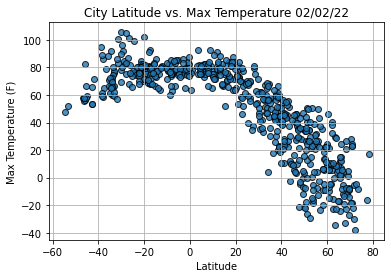

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

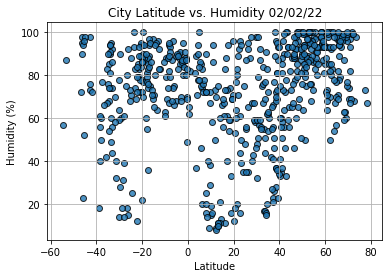

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

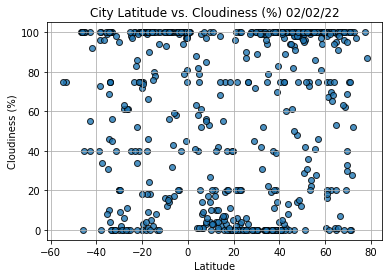

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

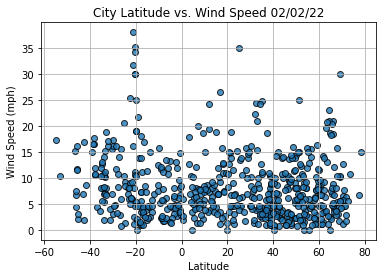

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()